In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df = pd.read_csv(r'C:\Users\abhic\My Datasets\Rating_re.csv')
df

,Unnamed: 0,Review_title,Reiew_text,Ratings
0,0,Really Nice,"Performance wise too good, display quality is ...",4
1,1,Mind-blowing purchase,Awesome laptop 😍\nBoot very fast and every app...,5
2,2,Terrific,Compact design and great performance,5
3,3,Best in the market!,The product is very good.\nJust loved it at th...,5
4,4,Good choice,1.Product was good without any damages.\n2.Lap...,4
...,...,...,...,...
23400,23400,Brilliant,Nice love you❤😘🤟 beautiful and very very much😊...,5
23401,23401,Highly recommended,It's amazing products,5
23402,23402,Wonderful,It's a very good products\nDelivery is fast,5
23403,23403,Perfect product!,Good quality worth for money,5


In [5]:
#Merging feature Review Titles and Review Descriptions to Review Titles
df['review_text'] = df['Review_title'].apply(lambda x: str(x)+" ") + df['Reiew_text']

#Rename column Ratings to rating
df.rename(columns={'Ratings':'rating'},inplace=True)

#Dropping feature Review Titles and Review Descriptions as these are already merged into review_text
df.drop(columns=['Review_title','Reiew_text'],inplace=True)

#interpreting first 5 rows of new dataset
df.head()

,Unnamed: 0,rating,review_text
0,0,4,"Really Nice Performance wise too good, display..."
1,1,5,Mind-blowing purchase Awesome laptop 😍\nBoot v...
2,2,5,Terrific Compact design and great performance
3,3,5,Best in the market! The product is very good.\...
4,4,4,Good choice 1.Product was good without any dam...


In [6]:
#checking general informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23405 entries, 0 to 23404
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   23405 non-null  int64 
 1   rating       23405 non-null  int64 
 2   review_text  23405 non-null  object
dtypes: int64(2), object(1)
memory usage: 548.7+ KB


In [7]:
#checking null values
df.isnull().sum()

Unnamed: 0     0
rating         0
review_text    0
dtype: int64

<AxesSubplot:>

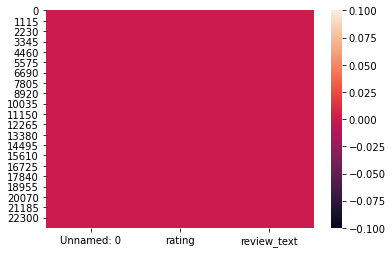

In [8]:
# plotting heatmap
sns.heatmap(df.isnull())

In [9]:
#converting all the review_text to lowercase
df.review_text = df.review_text.str.lower()

#interpreting first 5 rows
df.head()

,Unnamed: 0,rating,review_text
0,0,4,"really nice performance wise too good, display..."
1,1,5,mind-blowing purchase awesome laptop 😍\nboot v...
2,2,5,terrific compact design and great performance
3,3,5,best in the market! the product is very good.\...
4,4,4,good choice 1.product was good without any dam...


In [10]:
# Dropping the column 'Unnamed: 0' since this is of no use

df = df.drop(['Unnamed: 0'], axis=1)

df

,rating,review_text
0,4,"really nice performance wise too good, display..."
1,5,mind-blowing purchase awesome laptop 😍\nboot v...
2,5,terrific compact design and great performance
3,5,best in the market! the product is very good.\...
4,4,good choice 1.product was good without any dam...
...,...,...
23400,5,brilliant nice love you❤😘🤟 beautiful and very ...
23401,5,highly recommended it's amazing products
23402,5,wonderful it's a very good products\ndelivery ...
23403,5,perfect product! good quality worth for money


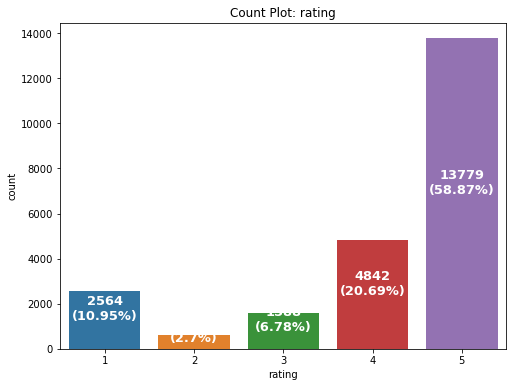

In [11]:
#checking feature rating using count plot
x = 'rating'
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.countplot(x=x,data=df,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(df),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()

In [12]:
#adding a new column length for review text length
df['length'] = df.review_text.str.len()

#interpreting first 5 rows
df.head()

,rating,review_text,length
0,4,"really nice performance wise too good, display...",194
1,5,mind-blowing purchase awesome laptop 😍\nboot v...,148
2,5,terrific compact design and great performance,45
3,5,best in the market! the product is very good.\...,85
4,4,good choice 1.product was good without any dam...,158


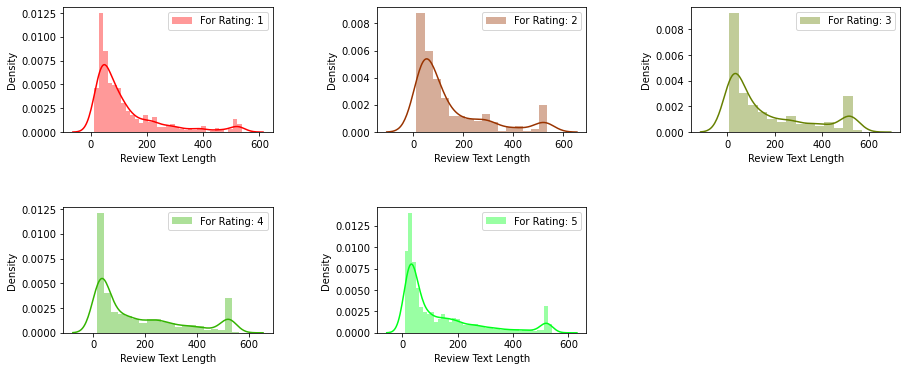

In [13]:
#checking review text length distribution for each rating
ratings = np.sort(df.rating.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.length[df.rating==i],ax=axis,label=f"For Rating: {i}",color=colors[i-1])
    axis.set_xlabel(f"Review Text Length")
    axis.legend()
    p += 1
    
plt.show()

In [14]:
# Replace money sysmbols with 'dollars' Euro symbol: Alt + 156
df.review_text = df.review_text.str.replace(r'₹|\£|\$','dollars')

# Replace number with 'numbr'
df.review_text = df.review_text.str.replace(r'\d+(\.\d+)?','numbr')

# Remove punctuation
df.review_text = df.review_text.str.replace(r'[^\w\d\s]',' ')

# Replace white space between term with single space
df.review_text = df.review_text.str.replace(r'\s+',' ')

# Remove leading and trailing whitespaces
df.review_text = df.review_text.str.replace(r'^\s+|\s+?$','')

In [15]:
df.head()

,rating,review_text,length
0,4,really nice performance wise too good display ...,194
1,5,mind blowing purchase awesome laptop boot very...,148
2,5,terrific compact design and great performance,45
3,5,best in the market the product is very good ju...,85
4,4,good choice numbr product was good without any...,158


In [16]:
# Removing Stop wards
#setting stop words
stop_words = set(stopwords.words('english') + ['u','ur','ure','im','gd','dont','doin'])

#removing stop words
df.review_text = df.review_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [17]:
#Adding new column clean_length for review_text length after cleaning
df['clean_length'] = df.review_text.str.len()

#Interpreting first 5 rows
df.head()

,rating,review_text,length,clean_length
0,4,really nice performance wise good display qual...,194,151
1,5,mind blowing purchase awesome laptop boot fast...,148,109
2,5,terrific compact design great performance,45,41
3,5,best market product good loved first glance,85,43
4,4,good choice numbr product good without damages...,158,127


In [18]:
#Checking the difference between original review text length and cleaned length
print(f"Orignal Review Text Length: {df.length.sum()}")
print(f"Cleaned Review Text Length: {df.clean_length.sum()}")
print(f"Difference: {df.length.sum() - df.clean_length.sum()}")

Orignal Review Text Length: 3348926
Cleaned Review Text Length: 2458376
Difference: 890550


Review text length reduced by greater length after removal of stop words and punctuations.

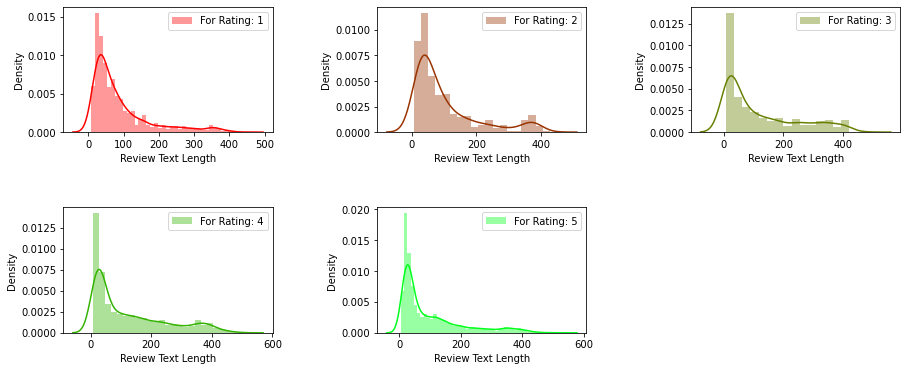

In [19]:
#checking review text length distribution for each rating after cleaning
ratings = np.sort(df.rating.unique())
cols = 3
rows = len(ratings)//cols
if len(ratings) % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.clean_length[df.rating==i],ax=axis,label=f"For Rating: {i}",color=colors[i-1])
    axis.set_xlabel(f"Review Text Length")
    axis.legend()
    p += 1

plt.show()

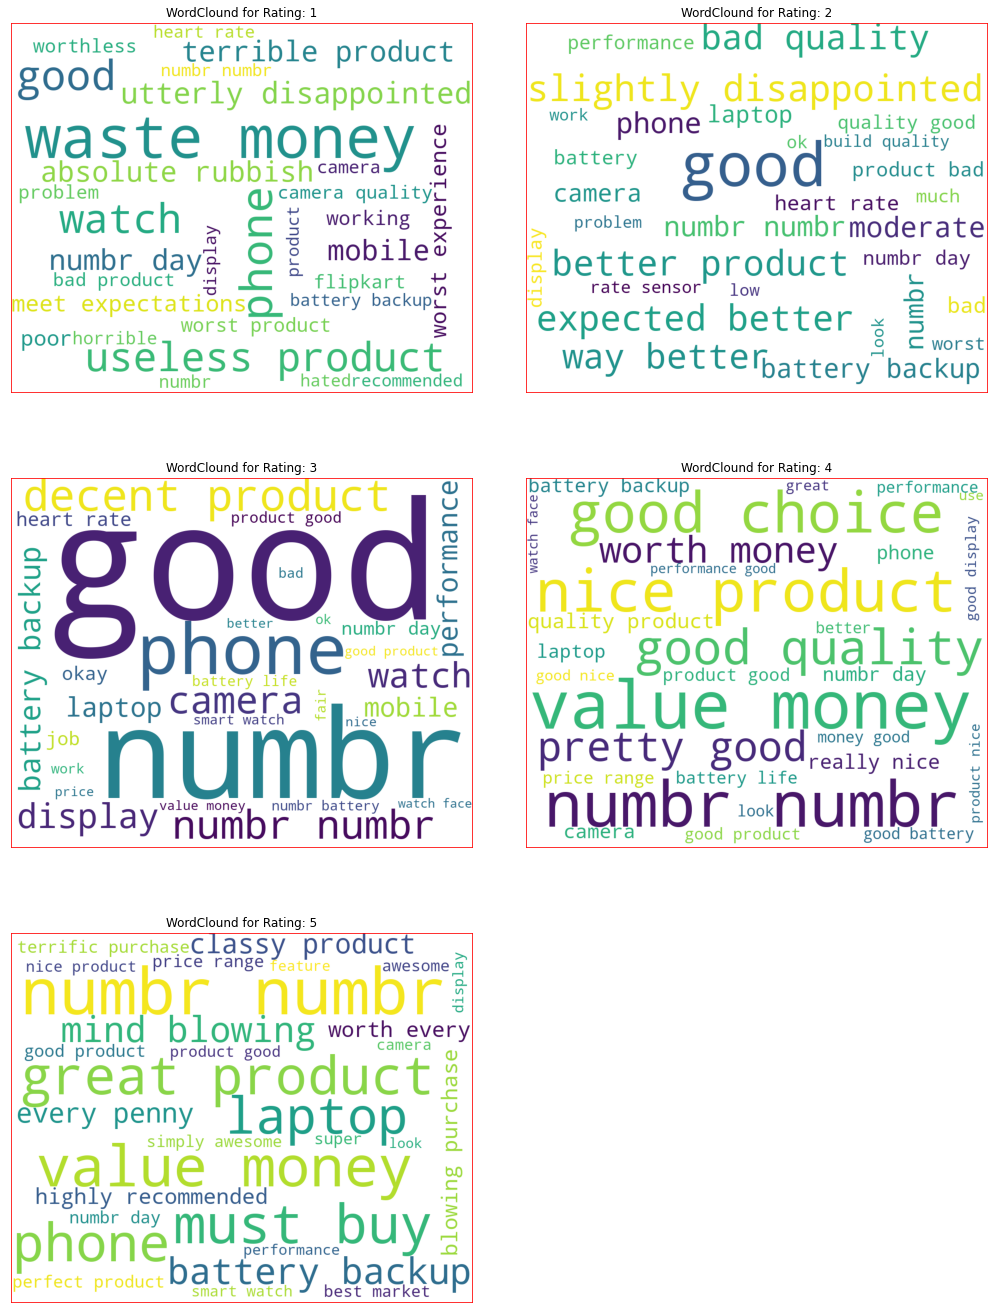

In [20]:
# Word Cloud
# getting sense of loud word in each rating
from wordcloud import WordCloud
cols = 2
rows = len(ratings)//2
if len(ratings) % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)
p = 1
for i in ratings:
    word_cloud = WordCloud(height=800, width=1000, background_color="white",max_words=30).generate(' '.join(df.review_text[df.rating==i]))
    axis = fig.add_subplot(rows,cols,p)
    axis.set_title(f"WordClound for Rating: {i}")
    axis.imshow(word_cloud)
    for spine in axis.spines.values():
        spine.set_edgecolor('r')
    axis.set_xticks([])
    axis.set_yticks([])
    
    plt.tight_layout(pad=5)
    p += 1
    
plt.show()

In [21]:
#converting text into vectors using TF-IDF
tfidf = TfidfVectorizer()

#vectorizing text features
features = tfidf.fit_transform(df.review_text)

In [22]:
#Input Variable
X = features

#Output Variable
Y = df.rating

In [23]:
# Creating train test split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=85,test_size=.25)

In [24]:
# Creating empty list

Model = []
score = []
cv_score = []

In [25]:
LR=LogisticRegression()
Model.append('LogisticRegression')
LR.fit(x_train,y_train)
print(LR)
pre=LR.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(LR,X,Y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cv_score.append(sc*100)

LogisticRegression()


Accuracy_score=  0.9386534518113465
Cross_val_score= 0.9040375988036745 



In [26]:
KNN=KNeighborsClassifier(n_neighbors=6)

Model.append('KNeighborsClassifier')
KNN.fit(x_train,y_train)
print(KNN)

pre=KNN.predict(x_test)
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)

score.append(AS*100)
sc=cross_val_score(KNN,X,Y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc)
cv_score.append(sc*100)


KNeighborsClassifier(n_neighbors=6)
Accuracy_score=  0.8848257006151743
Cross_val_score= 0.8214484084597308


In [27]:
DT=DecisionTreeClassifier()
Model.append('DecisionTreeClassifier')
DT.fit(x_train,y_train)
print(DT)
pre=DT.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(DT,X,Y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cv_score.append(sc*100)

DecisionTreeClassifier()


Accuracy_score=  0.948051948051948
Cross_val_score= 0.8769066438795129 



In [28]:
RF = RandomForestClassifier()
Model.append('RandomForestClassifier')
RF.fit(x_train,y_train)
print(RF)
pre=RF.predict(x_test)
print('\n')

AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(RF,X,Y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')

cv_score.append(sc*100)

RandomForestClassifier()


Accuracy_score=  0.9646274777853725
Cross_val_score= 0.9168980986968596 



In [29]:
#Calculating the difference between accuracy score and cross validation score
difference = list(np.array(score) - np.array(cv_score))

# Creating dataframe
result = pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv_score,
                       'Difference':difference})
result

,Model,Accuracy_score,Cross_val_score,Difference
0,LogisticRegression,93.865345,90.403760,3.461585
1,KNeighborsClassifier,88.482570,82.144841,6.337729
2,DecisionTreeClassifier,94.805195,87.690664,7.114530
3,RandomForestClassifier,96.462748,91.689810,4.772938


In [30]:
# Lets select the different parameters for tuning our best model (RandomForestClassifier)
grid_params = {'n_estimators':[100,200],
               'criterion':['gini','entropy'],
               'max_depth': [500,800],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(RF, grid_params, cv=3, verbose=3)
GSCV.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100; total time=  39.7s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100; total time=  37.5s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100; total time=  37.2s
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200; total time= 1.3min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200; total time= 1.2min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200; total time= 1.2min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100; total time=  38.2s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100; total time=  36.9s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100; total time=  37.5s
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=800, n_esti

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [500, 800], 'n_estimators': [100, 200]},
             verbose=3)

In [31]:
GSCV.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 800,
 'n_estimators': 200}

In [32]:
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report
best_model = RandomForestClassifier(bootstrap=False, criterion="gini", max_depth=800, n_estimators=200)
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 96.63362952836637

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.97      0.99      0.98       641
           2       0.98      0.83      0.90       148
           3       0.98      0.89      0.93       392
           4       0.96      0.91      0.94      1203
           5       0.96      0.99      0.98      3468

    accuracy                           0.97      5852
   macro avg       0.97      0.92      0.95      5852
weighted avg       0.97      0.97      0.97      5852


CONFUSION MATRIX: 
 [[ 636    1    0    0    4]
 [   9  123    3    6    7]
 [   6    2  349   21   14]
 [   0    0    3 1098  102]
 [   2    0    0   17 3449]]


In [38]:
# Saving the final model
import joblib
filename = 'ratings_review_project.pkl'
joblib.dump(best_model, open(filename, 'wb'))